In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
combined_data = pd.read_csv('data/combined_data/combined_data.csv')

In [39]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19,59,0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,0,6.9,3.3,7.6,239.695455
2,24,31.8,16.9,51,0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46,0,6.9,3.3,5.4,223.208333


In [40]:
combined_data.dtypes

T          object
TM         object
Tm         object
H          object
PP         object
VV         object
V          object
VM         object
PM_2_5    float64
dtype: object

In [41]:
for col in combined_data.columns[:-1]:
    combined_data[col] = pd.to_numeric(combined_data[col], errors='coerce')

In [42]:
combined_data.dtypes

T         float64
TM        float64
Tm        float64
H         float64
PP        float64
VV        float64
V         float64
VM        float64
PM_2_5    float64
dtype: object

In [43]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [44]:
combined_data.isna().sum()

T          3
TM         3
Tm         3
H          3
PP        18
VV         3
V          3
VM         9
PM_2_5     0
dtype: int64

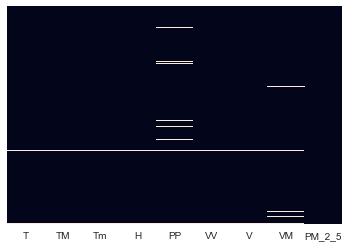

In [45]:
sns.heatmap(combined_data.isna(), yticklabels=False, cbar=False)

In [46]:
combined_data = combined_data.dropna()

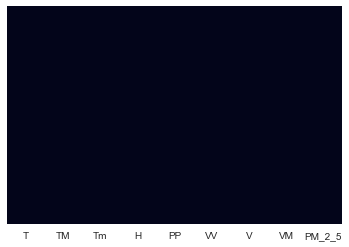

In [47]:
sns.heatmap(combined_data.isna(), yticklabels=False, cbar=False)

In [48]:
combined_data.shape

(537, 9)

In [49]:
combined_data['PM_2_5'].value_counts()

0.000000      15
79.000000      3
212.125000     2
30.625000      2
37.625000      2
              ..
64.875000      1
111.958333     1
210.875000     1
86.375000      1
108.000000     1
Name: PM_2_5, Length: 505, dtype: int64

In [50]:
# Drop rows where PM2.5 is 0.0
combined_data = combined_data[combined_data['PM_2_5'] != 0.0]

In [51]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [52]:
combined_data.shape

(522, 9)

In [53]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

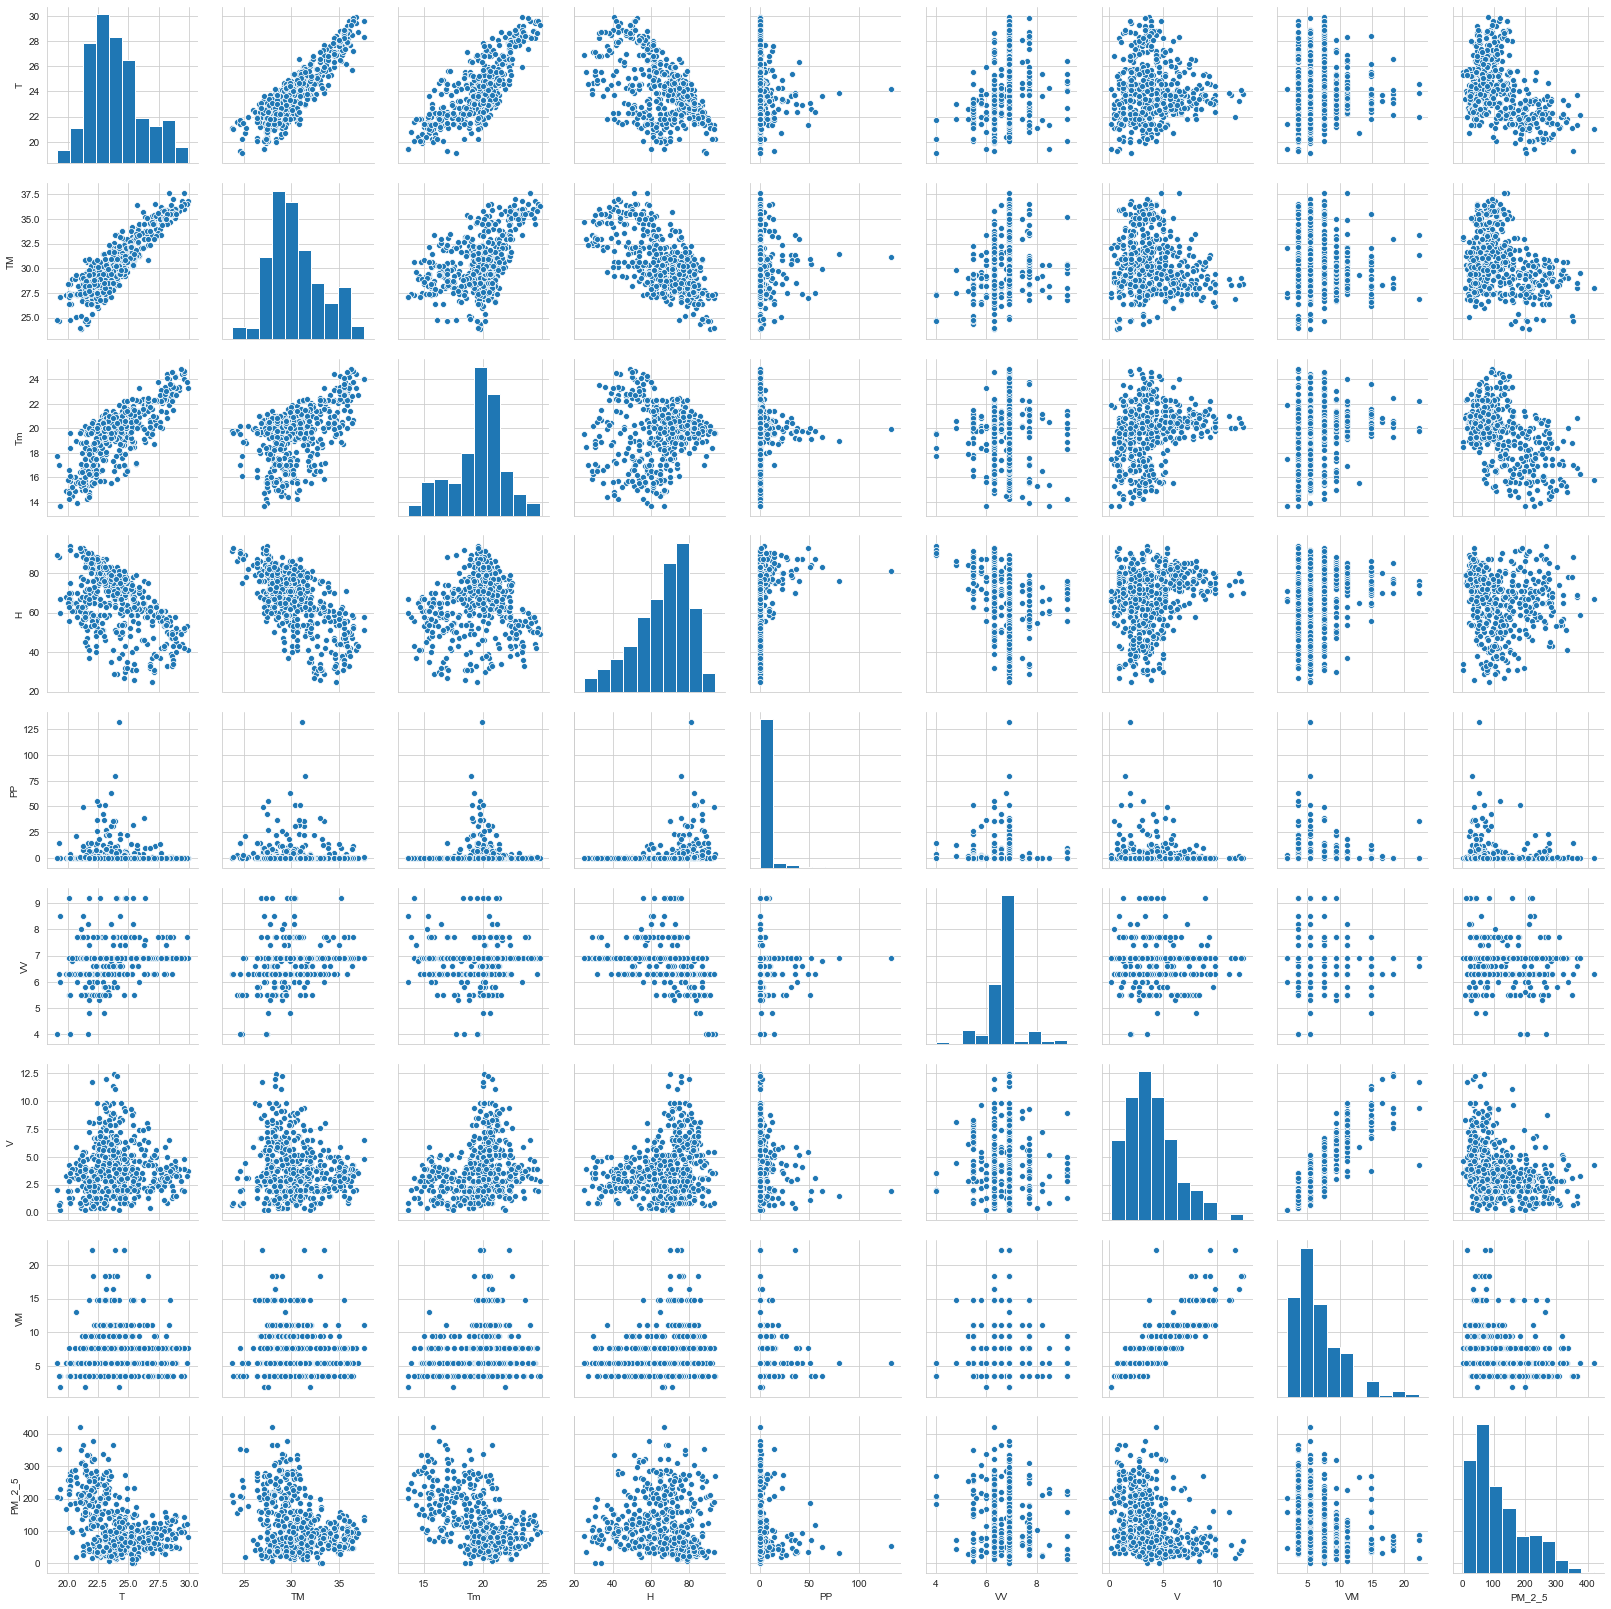

In [54]:
sns.pairplot(combined_data)

In [55]:
combined_data.corr()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
T,1.000000,0.886066,0.754669,-0.485987,-0.066337,0.265192,0.037140,0.038449,-0.408419
TM,0.886066,1.000000,0.486710,-0.667174,-0.045421,0.263024,-0.134021,-0.089428,-0.251422
Tm,0.754669,0.486710,1.000000,0.120643,0.024127,0.034922,0.271600,0.248564,-0.514636
H,-0.485987,-0.667174,0.120643,1.000000,0.270014,-0.303661,0.278017,0.257704,-0.128596
PP,-0.066337,-0.045421,0.024127,0.270014,1.000000,-0.068208,-0.091420,-0.050060,-0.126596
VV,0.265192,0.263024,0.034922,-0.303661,-0.068208,1.000000,-0.008328,-0.041237,-0.119884
V,0.037140,-0.134021,0.271600,0.278017,-0.091420,-0.008328,1.000000,0.842111,-0.371244
VM,0.038449,-0.089428,0.248564,0.257704,-0.050060,-0.041237,0.842111,1.000000,-0.346540
PM_2_5,-0.408419,-0.251422,-0.514636,-0.128596,-0.126596,-0.119884,-0.371244,-0.346540,1.000000


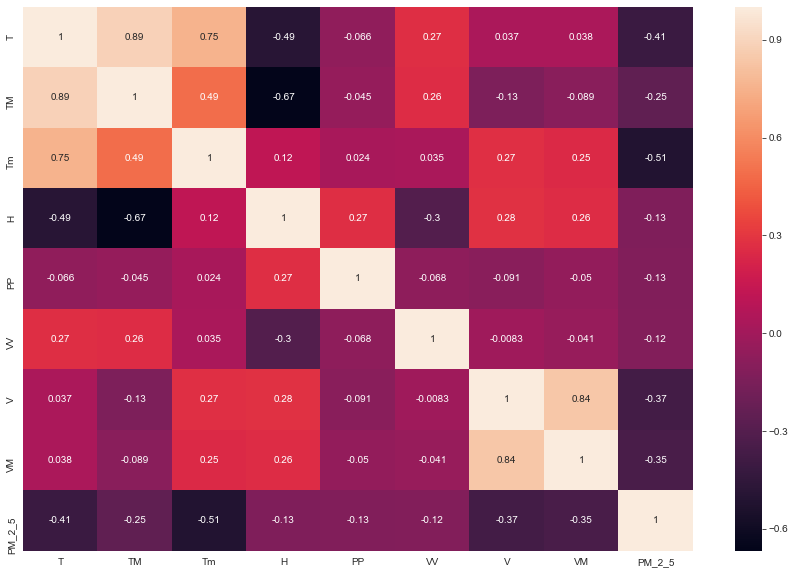

In [67]:
plt.figure(figsize=(15, 10))
ax = sns.heatmap(combined_data.corr(), annot=True)
# need this since due to bug in current version of matplotlib and seaborn
# top and bottom rows are cut in half
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [68]:
from sklearn.ensemble import ExtraTreesRegressor
feature_selector = ExtraTreesRegressor()
feature_selector.fit(X,y)

/opt/anaconda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [69]:
feature_selector.feature_importances_

array([0.19785501, 0.1234025 , 0.28217598, 0.08344079, 0.05512508,
       0.06663428, 0.11692318, 0.07444319])

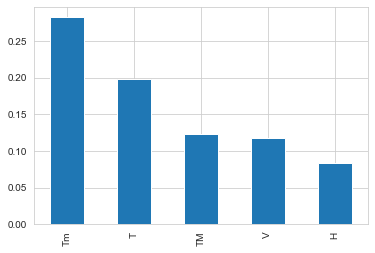

In [72]:
pd.Series(feature_selector.feature_importances_, index=X.columns).nlargest(5).plot(kind='bar')

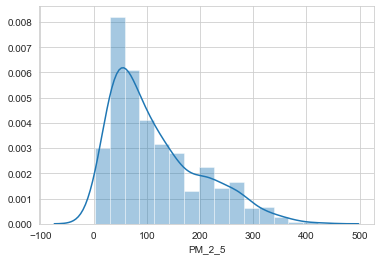

In [73]:
sns.distplot(y)

In [102]:
combined_data.to_csv('data/combined_data/cleaned_data.csv', index=None)